#  Task 1



In [1]:
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.ticker as mtick

In [2]:
pro = ts.pro_api()

In [3]:
def daily_return_rate(df):
    '''
    Calculate the daily_return_rate for a stock
    
    Input: A dataframe, stock information
    
    Output: A dataframe with extra columns of lag-1 close info and daily_return_rate
    '''
    df['close_lag1'] = df['close'].shift(-1)
    df['daily_return_rate'] = (df['close'] - df['close_lag1'])/df['close_lag1']

In [4]:
# 上证指数
df1 = pro.index_daily(ts_code = '000001.SH', start_date = '20210831')
df1['trade_date'] = pd.to_datetime(df1['trade_date'].astype(str), format = '%Y-%m-%d')
daily_return_rate(df1)

In [5]:
# 中信证券
df2 = pro.daily(ts_code = '600030.SH', start_date = '20210831')
df2['trade_date'] = pd.to_datetime(df2['trade_date'].astype(str), format = '%Y-%m-%d')
daily_return_rate(df2)

In [6]:
# 华鲁恒升
df3 = pro.daily(ts_code = '600426.SH', start_date = '20210831')
df3['trade_date'] = pd.to_datetime(df3['trade_date'].astype(str), format = '%Y-%m-%d')
daily_return_rate(df3)

In [7]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

Text(0.5, 1.0, '华鲁恒升日收益率变化情况')

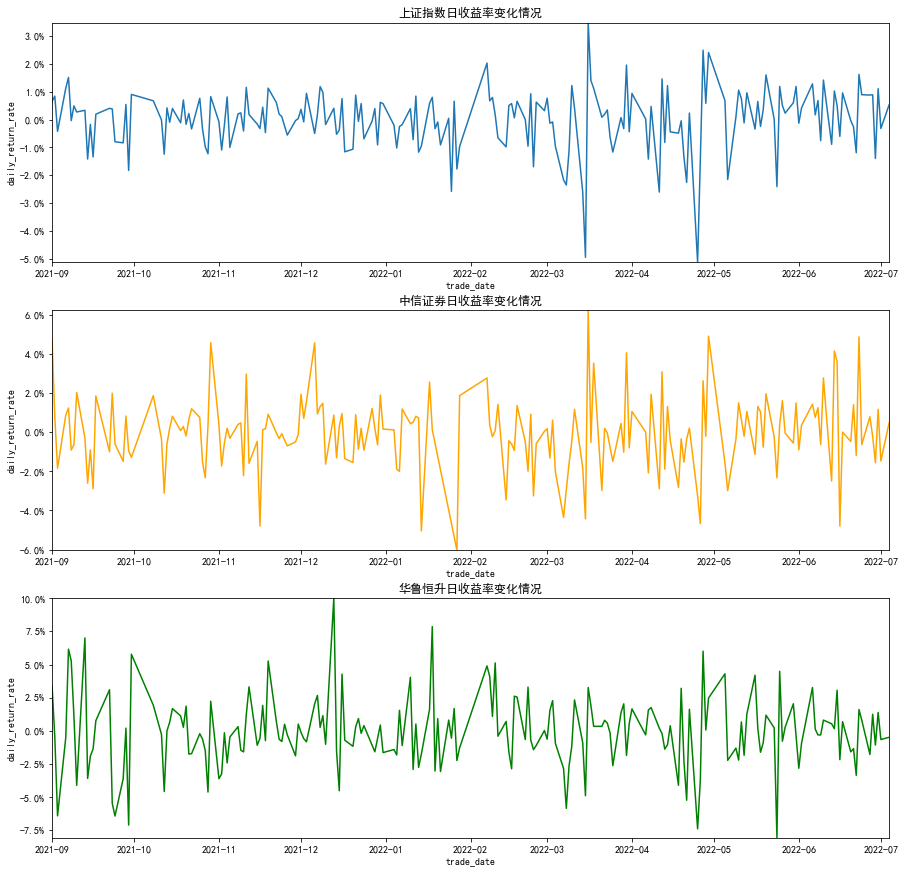

In [8]:
fig, axs = plt.subplots(nrows = 3, figsize = (15, 15))
sns.lineplot(x = 'trade_date', y = df1['daily_return_rate'] * 100, data = df1, ax = axs[0])
sns.lineplot(x = 'trade_date', y = df2['daily_return_rate'] * 100, data = df2, ax = axs[1], color = 'orange')
sns.lineplot(x = 'trade_date', y = df3['daily_return_rate'] * 100, data = df3, ax = axs[2], color = 'green')
axs[0].set_xlim(datetime.date(2021, 9, 1), max(df1['trade_date']))
axs[0].set_ylim(min(df1['daily_return_rate']) * 100, 
                max(df1['daily_return_rate']) * 100)
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_title('上证指数日收益率变化情况')
axs[1].set_xlim(datetime.date(2021, 9, 1), max(df2['trade_date']))
axs[1].set_ylim(min(df2['daily_return_rate']) * 100, 
                max(df2['daily_return_rate']) * 100)
axs[1].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[1].set_title('中信证券日收益率变化情况')
axs[2].set_xlim(datetime.date(2021, 9, 1), max(df3['trade_date']))
axs[2].set_ylim(min(df3['daily_return_rate']) * 100, 
                max(df3['daily_return_rate']) * 100)
axs[2].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[2].set_title('华鲁恒升日收益率变化情况')

# Task 2

In [9]:
# import statsmodels.api as sm

In [10]:
df_hs = pro.index_daily(ts_code = '000300.SH', start_date='20210831', end_date='')
df_hs['trade_date'] = pd.to_datetime(df_hs['trade_date'].astype(str), format='%Y-%m-%d')
daily_return_rate(df_hs)

In [11]:
df_hs.head(5)

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,close_lag1,daily_return_rate
0,000300.SH,2022-07-04,4496.0303,4447.2159,4496.0338,4427.8232,4466.7179,29.3124,0.6562,146345651.0,3.569685e+08,4466.7179,0.006562
1,000300.SH,2022-07-01,4466.7179,4489.5204,4500.9853,4449.2914,4485.0108,-18.2929,-0.4079,144779599.0,3.184921e+08,4485.0108,-0.004079
2,000300.SH,2022-06-30,4485.0108,4418.0656,4514.9968,4418.0656,4421.3570,63.6538,1.4397,156666289.0,3.543439e+08,4421.3570,0.014397
3,000300.SH,2022-06-29,4421.3570,4472.7346,4503.1307,4413.9961,4490.5166,-69.1596,-1.5401,187276688.0,3.959261e+08,4490.5166,-0.015401
4,000300.SH,2022-06-28,4490.5166,4442.5811,4497.8949,4407.3519,4444.2639,46.2527,1.0407,174756489.0,3.616860e+08,4444.2639,0.010407


In [12]:
# drr stands for daily_return_rate
data = {'drr_sz': df1['daily_return_rate'],
        'drr_zx': df2['daily_return_rate'], 
       'drr_hl': df3['daily_return_rate'],
       'drr_hs': df_hs['daily_return_rate']}
df_drr = pd.DataFrame(data)

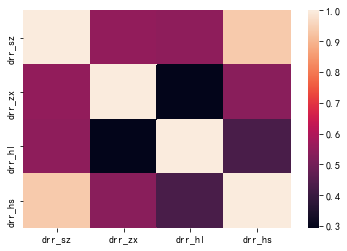

In [13]:
sns.heatmap(df_drr.corr());

从热力图来看，在我们所选取的三个股票中，上证指数与沪深300的相关性最大在0.9以上浮动。而另外两支股票与沪深300的相关性则相对要弱得多，仅占0.5左右。